# Investigation of properties of the Nearest Advocate method for time delay estimation on real event-based time-series data

**Methods:**
1. Nearest Advocate (NAd): dense, different sparse-factors  


In [1]:
import os
import time

import numpy as np
np.random.seed(0)

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

from multiprocessing import Pool

# Load methods
%matplotlib inline

In [2]:
# importer for the methods, styles and data
from methods import modify_timeseries, nearest_advocate
from data_loader import load_heart_beats, load_breath_rate, load_step_rate

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
# directories to load
PATH_HEART_RATE_DATA = "../data/HeartBeatData"
PATH_BREATH_RATE_DATA = "../data/BreathRateData"
PATH_STEP_RATE_DATA = "../data/StepRateData"

# parameters to semi-simulate data
OFFSET = np.pi
SIGMA = 0.1

# parameters for Nearest-Advocate
DIST_MAX = -1           # use the default values for dist_max and dist_padding of nearest_advocate
REGULATE_PADDINGS = True  # regulate the paddings in nearest_advocate
TD_MAX = 300               # search space of 10 minutes
TD_MIN = -300
SAMPLES_PER_S = 20        # precision of the search space (for steps of mean freq 0.5s)

## Data

### Load the datasets

In [4]:
heart_beat_dataset = load_heart_beats(path_to_dir=PATH_HEART_RATE_DATA, verbose=1)

Loading files S18_11_nn.txt and S18_1_beats_synced.csv.
Loading files S18_21_nn.txt and S18_2_beats_synced.csv.
Loading files S19_11_nn.txt and S19_1_beats_synced.csv.
Loading files S20_11_nn.txt and S20_1_beats_synced.csv.
Loading files S20_21_nn.txt and S20_2_beats_synced.csv.
Loading files S21_11_nn.txt and S21_1_beats_synced.csv.
Loading files S21_21_nn.txt and S21_2_beats_synced.csv.
Loading files S23_11_nn.txt and S23_1_beats_synced.csv.
Loading files S23_21_nn.txt and S23_2_beats_synced.csv.
Loading files S24_11_nn.txt and S24_1_beats_synced.csv.
Loading files S24_21_nn.txt and S24_2_beats_synced.csv.
Loading files S26_11_nn.txt and S26_1_beats_synced.csv.
Loading files S27_11_nn.txt and S27_1_beats_synced.csv.
Loading files S28_11_nn.txt and S28_1_beats_synced.csv.
Loading files S28_21_nn.txt and S28_2_beats_synced.csv.
Loading files S29_11_nn.txt and S29_1_beats_synced.csv.
Loading files S29_21_nn.txt and S29_2_beats_synced.csv.


In [5]:
breath_rate_dataset = load_breath_rate(path_to_dir=PATH_BREATH_RATE_DATA, verbose=1)

Loading files P05_Reference_FlowReversals_OVERALL.csv and P05_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P06_Reference_FlowReversals_OVERALL.csv and P06_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P07_Reference_FlowReversals_OVERALL.csv and P07_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P08_Reference_FlowReversals_OVERALL.csv and P08_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P09_Reference_FlowReversals_OVERALL.csv and P09_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P10_Reference_FlowReversals_OVERALL.csv and P10_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P11_Reference_FlowReversals_OVERALL.csv and P11_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P12_Reference_FlowReversals_OVERALL.csv and P12_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P13_Reference_FlowReversals_OVERALL.csv and P13_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P14_Reference_FlowReversals_OVERALL.csv and P14_SportsSRS_FlowReversals_OVERALL.csv.
Loading fi

In [6]:
step_rate_dataset = load_step_rate(path_to_dir=PATH_STEP_RATE_DATA, verbose=1)

Loading files P04_Reference_Strides_OVERALL.csv and P04_SportsSRS_Strides_OVERALL.csv.
Loading files P06_Reference_Strides_OVERALL.csv and P06_SportsSRS_Strides_OVERALL.csv.
Loading files P07_Reference_Strides_OVERALL.csv and P07_SportsSRS_Strides_OVERALL.csv.
Loading files P08_Reference_Strides_OVERALL.csv and P08_SportsSRS_Strides_OVERALL.csv.
Loading files P09_Reference_Strides_OVERALL.csv and P09_SportsSRS_Strides_OVERALL.csv.
Loading files P10_Reference_Strides_OVERALL.csv and P10_SportsSRS_Strides_OVERALL.csv.
Loading files P11_Reference_Strides_OVERALL.csv and P11_SportsSRS_Strides_OVERALL.csv.
Loading files P12_Reference_Strides_OVERALL.csv and P12_SportsSRS_Strides_OVERALL.csv.
Loading files P13_Reference_Strides_OVERALL.csv and P13_SportsSRS_Strides_OVERALL.csv.
Loading files P16_Reference_Strides_OVERALL.csv and P16_SportsSRS_Strides_OVERALL.csv.
Loading files P18_Reference_Strides_OVERALL.csv and P18_SportsSRS_Strides_OVERALL.csv.
Loading files P19_Reference_Strides_OVERALL

In [7]:
dataset_full = (heart_beat_dataset + breath_rate_dataset + step_rate_dataset)

## Function to semi-simulate the data

In [8]:
# create dummy time-series
arr_ref = np.cumsum(np.random.normal(loc=1, scale=0.25, size=600))
arr_sig = modify_timeseries(arr=arr_ref, offset=OFFSET, sigma=0.1, fraction=0.99)

## Define Methods

Found optimum for a time shift of 3.140s in 1.970s


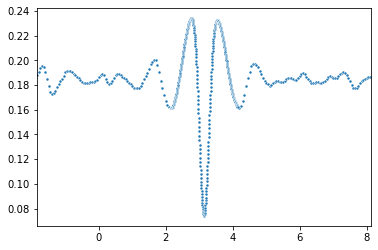

In [9]:
# run once before the test to just-in-time compile it
start_time = time.time()
time_delays = nearest_advocate(arr_ref=arr_ref, arr_sig=arr_sig, 
                             td_min=-10, td_max=10, td_prox=1, sps=SAMPLES_PER_S, sparse_factor=1, 
                             dist_max=DIST_MAX, regulate_paddings=REGULATE_PADDINGS, dist_padding=DIST_MAX)
time_shift, min_mean_dist = time_delays[np.argmin(time_delays[:,1])]
print(f"Found optimum for a time shift of {time_shift:.3f}s in {time.time()-start_time:.3f}s")

sns.scatterplot(x=time_delays[:,0], y=time_delays[:,1], marker='.')
plt.xlim(time_shift-5.0, time_shift+5.0)
plt.show()

## Plot the characteristical line of one sample

In [10]:
def plot_nearest_advocate(df_nearest, lb=-10, ub=15, savepath=None, alpha=0.05, cutofflevel=0.5, compact=False):
    # Plot main stuff and resulting optimum
    if compact:
        fig = plt.figure(figsize=(6,3))
    # df_nearest["score"] = -(df_nearest["error"] - np.median(df_nearest["error"])) / (np.median(df_nearest["error"]) - np.min(df_nearest["error"]))
    # df_nearest["probability"] = scipy.special.softmax(temperature*(df_nearest["score"]-df_nearest["error"].mean()))
    sns.lineplot(data=df_nearest, x="time-delta", y="error", color="steelblue", label="Distance")
    td_hat = df_nearest.loc[np.argmin(df_nearest["error"])]["time-delta"]
    plt.vlines(x=td_hat, ymin=0, ymax=1, color="firebrick", label=f"Shift = {td_hat:.2f}s")

    # Transform dataframe
    # df_nearest = df_nearest[(lb < df_nearest["time-delta"]) * (df_nearest["time-delta"] < ub)]
    avg = np.median(df_nearest["error"])
    df_nearest["score"] = avg - df_nearest["error"].copy()
    max_score = df_nearest["score"].max();
    df_nearest.loc[df_nearest["score"] < (cutofflevel*max_score), "score"] = 1e-9
    df_nearest["score"] /= df_nearest["score"].sum()
    if not compact:
        sns.lineplot(data=df_nearest, x="time-delta", y="score", color="darkturquoise", dashes=(1,1,1,1), label="Prob. density")
    
    # Confidence interval
    df_nearest["cumscore"] = df_nearest["score"].cumsum() / df_nearest["score"].sum()
    low_border = df_nearest.loc[df_nearest[df_nearest["cumscore"].gt(alpha/2)].index[0]]
    high_border = df_nearest.loc[df_nearest[df_nearest["cumscore"].gt(1-alpha/2)].index[0]]
    width = high_border['time-delta']-low_border['time-delta']

    # Plot statistics
    avg_prox = time_delay_df.loc[
        (td_hat+lb < time_delay_df["time-delta"]) & (time_delay_df["time-delta"] < td_hat+ub),
        "error"].mean()
    plt.hlines(y=avg_prox, xmin=td_hat+lb, xmax=td_hat+ub, color="black", label="Mean distance")
    b = (avg - df_nearest["error"].min()) #/ 2
    if not compact:
        plt.vlines(x=low_border["time-delta"], ymin=0, ymax=1, color="black", linestyle="dashed")
    if not compact:
        plt.vlines(x=high_border["time-delta"], ymin=0, ymax=1, color="black", linestyle="dashed", label=f"{100*(1-alpha):.0f}% conf. {width:.1f}s")
    df_peak = df_nearest[(low_border["time-delta"] <= df_nearest["time-delta"]) * (df_nearest["time-delta"] <= high_border["time-delta"])]

    plt.xlim([td_hat+lb, td_hat+ub])
    if not compact:
        plt.ylim([-0.01, 1.1*time_delay_df["error"].max()])
    else:
        plt.ylim([0.9*time_delay_df["error"].min(), 1.1*time_delay_df["error"].max()])
    plt.title("Characteristic Curve of Nearest Advocate")
    plt.xlabel("Time shift (s)")
    plt.ylabel("Mean distance (s)")
    
    plt.legend(loc="lower right")
    if savepath:
        plt.savefig(savepath, bbox_inches = "tight")
    plt.show()

In [11]:
arr_ref, arr_sig = heart_beat_dataset[0]
arr_ref = arr_ref[:1600]
arr_sig = arr_sig[:1600]

In [12]:
# run once before the test to just-in-time compile it
start_time = time.time()
DIST_MAX = -1
time_delays = nearest_advocate(arr_ref=arr_ref, arr_sig=arr_sig, 
                             td_min=TD_MIN, td_max=TD_MAX, td_prox=1, sps=SAMPLES_PER_S, sparse_factor=1, 
                             dist_max=DIST_MAX, regulate_paddings=REGULATE_PADDINGS, dist_padding=DIST_MAX)
time_shift, min_mean_dist = time_delays[np.argmin(time_delays[:,1])]
print(f"Found optimum for a time shift of {time_shift:.3f}s in {time.time()-start_time:.3f}s")

Found optimum for a time shift of -0.410s in 0.058s


In [13]:
# correct and shift by a offset
arr_sig = arr_sig[:1600] - time_shift + OFFSET

In [14]:
# run once before the test to just-in-time compile it
start_time = time.time()
DIST_MAX = -1
time_delays = nearest_advocate(arr_ref=arr_ref, arr_sig=arr_sig, 
                             td_min=TD_MIN, td_max=TD_MAX, td_prox=1, sps=SAMPLES_PER_S, sparse_factor=1, 
                             dist_max=DIST_MAX, regulate_paddings=REGULATE_PADDINGS, dist_padding=DIST_MAX)
time_shift, min_mean_dist = time_delays[np.argmin(time_delays[:,1])]
print(f"Found optimum for a time shift of {time_shift:.3f}s in {time.time()-start_time:.3f}s")

Found optimum for a time shift of 3.140s in 0.062s


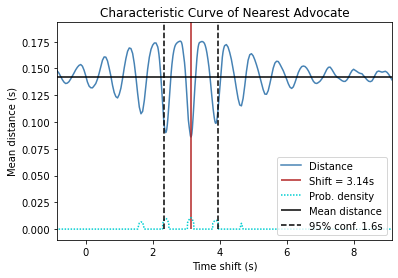

In [15]:
time_delay_df = pd.DataFrame(time_delays, columns=["time-delta", "error"])
plot_nearest_advocate(time_delay_df, 
                      lb=-4, ub=6,
                      alpha=0.05, cutofflevel=0.5, 
                      savepath="fig/real_syncplot_nearestadvocate.png")

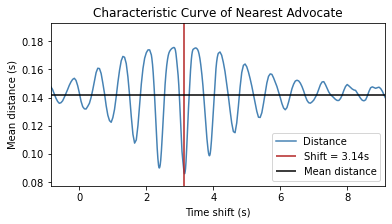

In [16]:
time_delay_df = pd.DataFrame(time_delays, columns=["time-delta", "error"])
plot_nearest_advocate(time_delay_df, 
                      lb=-4, ub=6,
                      alpha=0.05, cutofflevel=0.5, compact=True,  
                      savepath="fig/real_syncplot_nearestadvocate_compact.png")